In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import brewer2mpl
dark2_cmap = brewer2mpl.get_map('Dark2' , 'Qualitative' , 7)
dark2_colors = dark2_cmap.mpl_colors
rcParams[ 'figure.figsize' ] = (10, 6)
rcParams[ 'figure.dpi' ] = 150
rcParams[ 'axes.color_cycle' ] = dark2_colors
rcParams[ 'lines.linewidth' ] = 2
rcParams[ 'axes.facecolor' ] = 'white'
rcParams[ 'font.size' ] = 14
rcParams[ 'patch.edgecolor' ] = 'white'
rcParams[ 'patch.facecolor' ] = dark2_colors[0]
rcParams[ 'font.family' ] = 'StixGeneral'

In [2]:
def remove_border(axes=None, top=False , right=False , left=True, bottom=True):
    ax = axes or plt .gca()
    ax.spines ['top'].set_visible (top)
    ax.spines ['right'].set_visible ( right )
    ax.spines ['left'].set_visible ( left )
    ax.spines ['bottom'].set_visible (bottom)
    # turn off al l ticks
    ax.yaxis.set_ticks_position ( 'none')
    ax.xaxis.set_ticks_position ( 'none')
#now re -enable visibles
    if top :
        ax.xaxis.tick_top ()
    if bottom:
        ax.xaxis.tick_bottom()
    if left :
        ax.yaxis.tick_left ()
    if right :
        ax.yaxis.tick_right ()

In [3]:
sanfrancisco_data = pd.read_csv("./sanfrancisco_incidents_summer_2014.csv", low_memory=False)
seattle_data = pd.read_csv("./seattle_incidents_summer_2014.csv", low_memory=False)

In [4]:
sanfrancisco_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [5]:
seattle_data.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [6]:
features = ["Time", "Category"]
sanfrancisco_data_category_time = sanfrancisco_data[features]
seattle_features = ["Occurred Date or Date Range Start", "Offense Type"]
seattle_data_category_time = seattle_data[seattle_features]

# Pick the evening crime

In [7]:
def pick_evening(timeChar):
    hour = int(timeChar[0:2])
    if hour>=20 or hour<=5:
        return True
    return False

In [8]:
sanfrancisco_evening = sanfrancisco_data_category_time[sanfrancisco_data_category_time.apply(lambda x: pick_evening
                                                                                            (x["Time"]), axis=1)]
sanfrancisco_not_evening = sanfrancisco_data_category_time[sanfrancisco_data_category_time.apply(lambda x: not pick_evening
                                                                                            (x["Time"]), axis=1)]

In [9]:
sanfrancisco_evening.head()

,Time,Category
0,23:50,ARSON
1,23:45,NON-CRIMINAL
2,23:30,LARCENY/THEFT
3,23:30,LARCENY/THEFT
4,23:23,NON-CRIMINAL


In [10]:
sanfrancisco_not_evening.head()

,Time,Category
79,19:45,LARCENY/THEFT
80,19:40,LARCENY/THEFT
81,19:40,ASSAULT
82,19:40,ASSAULT
83,19:30,ASSAULT


In [11]:
seattle_data_category_time.columns = ["Time", "Category"]
seattle_data_category_time.head(5)

,Time,Category
0,06/28/2014 10:31:00 AM,BURGLARY-FORCE-RES
1,06/01/2014 12:00:00 AM,FRAUD-IDENTITY THEFT
2,08/31/2014 09:00:00 AM,THEFT-MAIL
3,06/20/2014 01:38:00 PM,COUNTERFEIT
4,06/01/2014 11:59:00 AM,THEFT-OTH


In [12]:
def pick_evening_seattle(timeChar):
    flag = timeChar[-2:]
    hour = int(timeChar[11:13])
    if(hour>=7 and flag == "PM"):
        return True
    if(hour<=6 and flag == "AM"):
        return True
    return False

In [13]:
seattle_evening = seattle_data_category_time[seattle_data_category_time.
                                             apply(lambda x:pick_evening_seattle(x["Time"]),
                                                  axis=1)]
seattle_not_evening = seattle_data_category_time[seattle_data_category_time.
                                             apply(lambda x:not pick_evening_seattle(x["Time"]),
                                                  axis=1)]

# Plot the evening crime and none evening crime

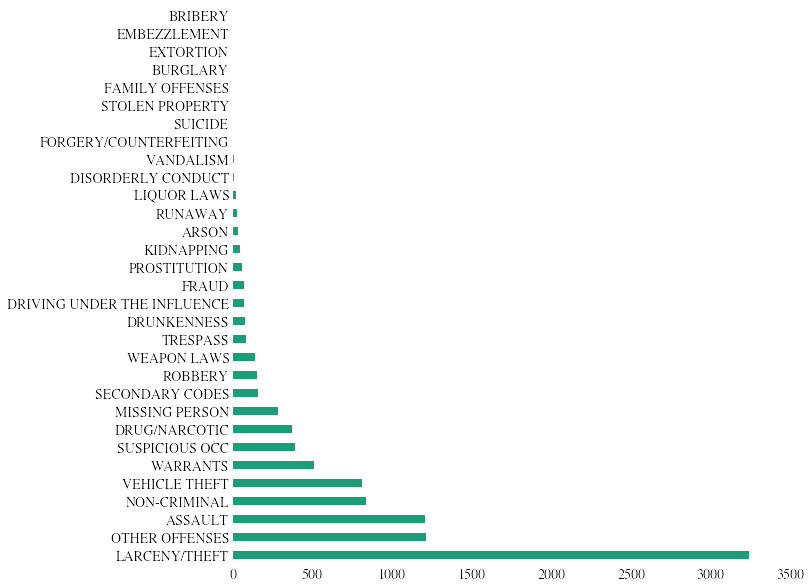

In [14]:
plt = sanfrancisco_evening.Category.value_counts().plot(kind='barh', figsize=(10,10))
remove_border(plt, left=False, bottom=False)

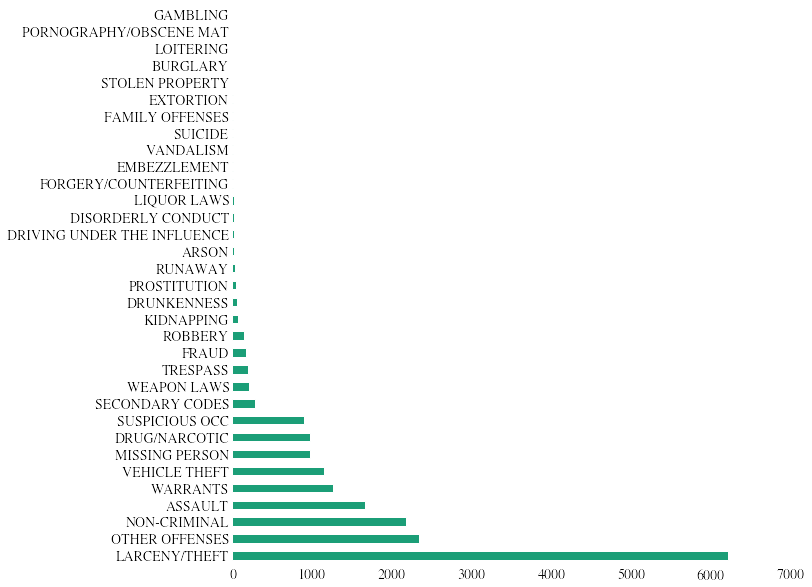

In [15]:
plt = sanfrancisco_not_evening.Category.value_counts().plot(kind='barh', figsize=(10,10))
remove_border(plt, left=False, bottom=False)

Theft is the most common criminal not only for the evening but also for the day.
We can plot in the same way for seattle, but the category name for seattle is too long

# Theft and Robbery for each hour of the day

In [16]:
sanfrancisco_data_category_time.insert(0, "Hour", sanfrancisco_data_category_time["Time"].map(lambda x: int(x[0:2])))

In [17]:
sanfrancisco_data_category_time.head()

,Hour,Time,Category
0,23,23:50,ARSON
1,23,23:45,NON-CRIMINAL
2,23,23:30,LARCENY/THEFT
3,23,23:30,LARCENY/THEFT
4,23,23:23,NON-CRIMINAL


In [18]:
sanfrancisco_theft = sanfrancisco_data_category_time[sanfrancisco_data_category_time["Category"]
                                                       =="LARCENY/THEFT"]

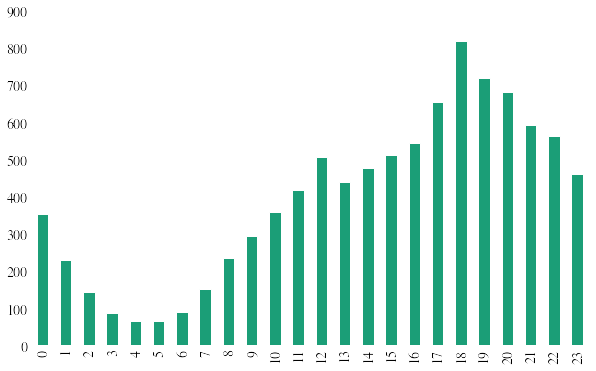

In [19]:
plt = sanfrancisco_theft["Hour"].value_counts().sort_index().plot(kind='bar')
remove_border(plt, left=False, bottom=False)

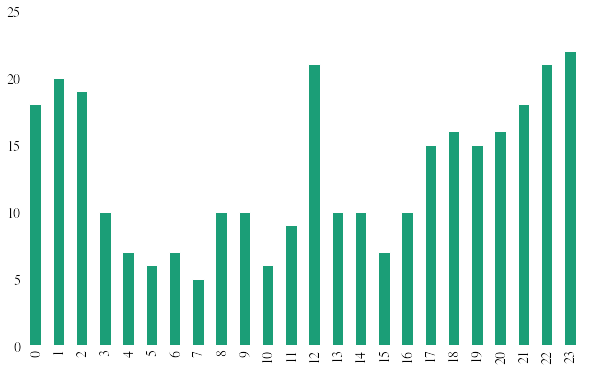

In [20]:
sanfrancisco_robbery = sanfrancisco_data_category_time[sanfrancisco_data_category_time["Category"]
                                                       =="ROBBERY"]
plt = sanfrancisco_robbery["Hour"].value_counts().sort_index().plot(kind='bar')
remove_border(plt, left=False, bottom=False)

At 3 AM, both crimes are low, maybe criminals also need sleep at that time . It is interesting to notice that robbery crimes happens most at 12 AM.